### EDA with Visuals
#### a. Visualize top 10 most played music artists & podcast shows

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import pandas as pd
import numpy as np

# load data
music_tracks_df = pd.read_csv('../Cleaned_Data/Music_Streaming_History.csv')
podcast_episodes_df = pd.read_csv('../Cleaned_Data/Podcast_Streaming_History.csv')


# set font to Microsoft YaHei to show Chinese characters
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

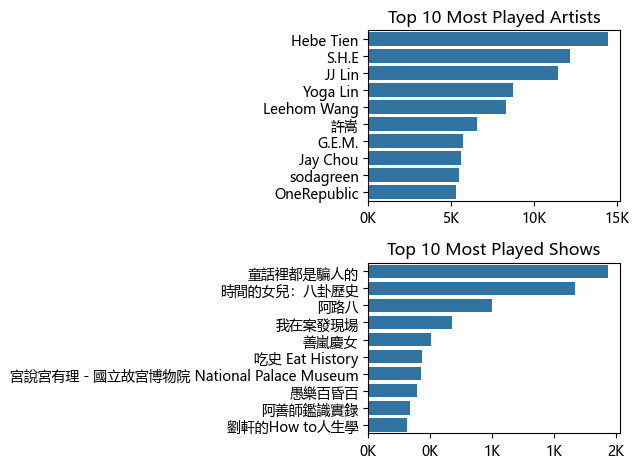

In [148]:
from matplotlib.ticker import FuncFormatter
fig, ax = plt.subplots(2,1)
# visualize top 10 most played artists
top_artists = music_tracks_df['artist_name'].value_counts().head(10)
sns.barplot(
    x=top_artists.values,
    y = top_artists.index,
    ax=ax[0]
)

ax[0].set_title('Top 10 Most Played Artists')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(FuncFormatter(lambda x,_: f'{int(x/1000)}K'))


# visualize top 10 most played shows (podcast)
top_show = podcast_episodes_df['show_name'].value_counts().head(10)
# adjust width and height
sns.barplot(
    x=top_show.values,
    y=top_show.index,
    ax=ax[1]
)

ax[1].set_title('Top 10 Most Played Shows')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(FuncFormatter(lambda x,_: f'{int(x/1000)}K'))

# ensure everything fits properly
plt.tight_layout()
plt.show()


#### b. Visualize Listening Trends Over Time

In [113]:
# visualize music listending trends over time
# group by month_year
music_month_year_trend = music_tracks_df.groupby('month_year').sum()['minutes_played']
podcast_month_year_trend = podcast_episodes_df.groupby('month_year').sum()['minutes_played']

#### Find the start month and end month across both datasets

In [133]:
# find start month
start_date = min(music_month_year_trend.index.min(),podcast_month_year_trend.index.min())

# find end month
end_date = max(music_month_year_trend.index.max(),podcast_month_year_trend.index.max())


#### Generate All Timestamps

In [135]:
all_dates = pd.date_range(start=start_date,end=end_date, freq='MS') #MS stands for Month Start, it will generate dates corresponding to the first day of each month in the range

#### Create 10 Time Labels to Distribute Evenly

In [137]:
# generate an array of 10 indices
'''
np.linspace(start, stop, num, dtype=int)
'''
desired_dates = np.linspace(0,len(all_dates)-1, 10,dtype=int) #-1 to ensure range ends at the last valid index

# pick out date labels from all_dates with desired_dates
desired_dates=all_dates[desired_dates]

# format date labels to mm/yyyy
desired_labels=[date.strftime('%m/%Y') for date in desired_dates]


#### Plot with subplots

C:\Users\Mei\AppData\Local\Temp\ipykernel_37024\1622430632.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend().remove()
C:\Users\Mei\AppData\Local\Temp\ipykernel_37024\1622430632.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[1].legend().remove()


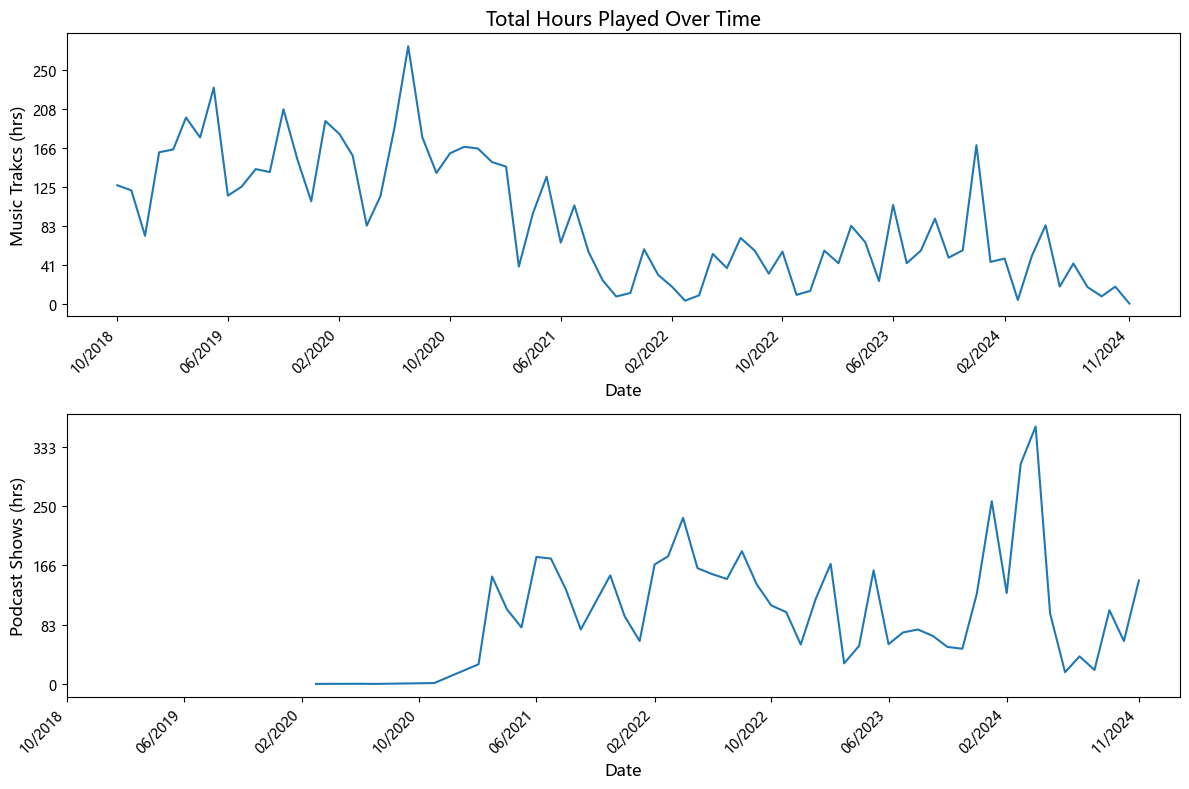

In [146]:
fig, ax = plt.subplots(2,1, figsize=(12,8))
'''
sns.lineplot(data,ax=,palette)
'''


# plot the first chart
sns.lineplot(
    data=music_month_year_trend,
    ax=ax[0]
)
ax[0].legend().remove()
ax[0].set_title('Total Hours Played Over Time', fontsize=14)
ax[0].set_ylabel('Music Trakcs (hrs)', fontsize=12)
ax[0].set_xlabel('Date', fontsize=12)
ax[0].set_xticks(desired_dates)
ax[0].set_xticklabels(desired_labels, rotation=45, ha='right') #rotate and right edge is aligned with anchor point
ax[0].yaxis.set_major_formatter(FuncFormatter(lambda y,_: f'{int(y/60)}'))

# plot the second chart
sns.lineplot(
    data=podcast_month_year_trend,
    ax=ax[1]
)
ax[1].legend().remove()
ax[1].set_title('')
ax[1].set_ylabel('Podcast Shows (hrs)', fontsize=12)
ax[1].set_xlabel('Date', fontsize=12)
ax[1].set_xticks(desired_dates)
ax[1].set_xticklabels(desired_labels,rotation=45, ha='right')
ax[1].yaxis.set_major_formatter(FuncFormatter(lambda y,_:f'{int(y/60)}'))

plt.tight_layout()
plt.show()